# Personalized emotion forecasting methods using NLP and ML
## Preprocessing

## Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.neighbors import LocalOutlierFactor

from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [ ]:
SEED = 1

## Preprocessing

### User emotions

First, we read the user emotions in a timestamp. 

In [ ]:
%cd '/content/drive/MyDrive/TFM/Preprocessing'

/content/drive/MyDrive/TFM/Preprocessing


In [ ]:
emotions_df = pd.read_csv('emotions.csv')

In [ ]:
emotions_df

,id,service,creation_datetime,date,time,ira,encantado,disgustado,tristeza,neutro,agobiado,cansado,asustado,feliz,motivado,relajado,dolor,label,social,emotion_text
0,2,das,2018-09-20 22:30:04+00:00,2018-09-20,22:29:40,0,0,0,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN
1,2,das,2018-09-24 21:15:44+00:00,2018-09-24,21:15:38,0,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,NaN
2,2,das,2018-09-27 19:35:09+00:00,2018-09-27,19:35:02,0,0,0,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN
3,2,das,2018-09-28 18:36:45+00:00,2018-09-28,18:36:38,1,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2,das,2018-10-03 09:01:11+00:00,2018-10-03,09:00:56,0,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43463,2981,ecog,2020-05-13 21:30:43+00:00,2020-05-13,21:30:27,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN
43464,2981,ecog,2020-05-28 16:47:14+00:00,2020-05-27,16:46:33,0,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,NaN
43465,2981,ecog,2020-05-28 16:47:39+00:00,2020-05-27,16:47:14,0,0,0,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN
43466,2981,ecog,2020-05-28 16:46:11+00:00,2020-05-28,16:45:37,0,0,0,0,1,0,0,0,0,0,0,0,NaN,NaN,indiferente


In [ ]:
emotions_df.service.value_counts()

afsp            20625
das             17792
ucv              1765
sleep            1059
SJD               598
gestor_casos      486
ecog              430
test              361
pc001             102
mct                87
cardiology         79
memind             48
games              34
exeira              2
Name: service, dtype: int64

In [ ]:
emotions_df.dtypes

id                    int64
service              object
creation_datetime    object
date                 object
time                 object
ira                   int64
encantado             int64
disgustado            int64
tristeza              int64
neutro                int64
agobiado              int64
cansado               int64
asustado              int64
feliz                 int64
motivado              int64
relajado              int64
dolor                 int64
label                object
social               object
emotion_text         object
dtype: object

In [ ]:
emotions_df.describe()

,id,ira,encantado,disgustado,tristeza,neutro,agobiado,cansado,asustado,feliz,motivado,relajado,dolor
count,43468.000000,43468.000000,43468.000000,43468.000000,43468.000000,43468.000000,43468.000000,43468.000000,43468.000000,43468.000000,43468.000000,43468.000000,43468.000000
mean,1532.668055,0.078034,0.028987,0.036096,0.208636,0.138010,0.066003,0.129406,0.064024,0.124781,0.017898,0.049485,0.101868
std,708.470549,0.268229,0.167771,0.186530,0.406338,0.344914,0.248289,0.335652,0.244799,0.330475,0.132583,0.216880,0.302478
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1068.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1809.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2981.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We see how many NaN values have each variable. 

In [ ]:
emotions_df.isna().sum()

id                       0
service                  0
creation_datetime        0
date                     0
time                     0
ira                      0
encantado                0
disgustado               0
tristeza                 0
neutro                   0
agobiado                 0
cansado                  0
asustado                 0
feliz                    0
motivado                 0
relajado                 0
dolor                    0
label                39151
social               39151
emotion_text         37330
dtype: int64

In [ ]:
print(emotions_df['social'].unique())
print(emotions_df['label'].unique())
print(emotions_df['emotion_text'].unique())

[nan True False]
[nan 'pareja' 'descanso' 'amigos' 'comer durante la noche' 'peso' 'viaje'
 'familia' 'andando' 'deporte' 'salud' 'otra' 'animales' 'comida'
 'trabajo' 'trabajo y cursos' 'Deporte' 'Trabajo' 'Familia' 'Comida'
 'fiesta' 'Amigos' 'Otra' 'Fiesta' 'Pareja' 'decidida' 'casa'
 'villaverde ' 'novio' 'dormir ' 'Descanso' ' falta de comcentracion'
 'Ansiedad' 'dispersión en pensamiento y accion' 'aceptarme' 'lectura'
 'Mi realidad ' 'muy bien con pareja ' 'museo' 'mi vida' 'estudios'
 'mi físico' 'Viaje' 'instituto ' 'en general ' 'agotamiento'
 'resolución del tribunal médico ' 'buen día con mi madre y mi hijo'
 'todo el día en la cama' 'ex novio' 'ds' 'vida' 'mucha ansiedad' 'yo'
 'Estudios' 'comida fanilir' 'Médicos' 'trabajo en casa' 'Duelo'
 'mascota ' 'tranquilo' 'culpa' 'desanimado' 'mi bebé ' 'mi Amaya'
 'tranquila' 'por todo' 'higiene personal' 'físicamente' 'médico'
 'universidad' 'estudio' 'examen' 'general' 'no sé' 'salud ' 'yo '
 'Travail' 'Couple' 'música ' 'desca

We delete the columns with NAN values. We still have the same number of rows. 

In [ ]:
emotions_df = emotions_df.dropna(axis=1)

In this first approach to the problem, we are going to merge the emotions above in order to have only 2: happiness and sadness. This will be predicted with just a variable, sadness. Whether is 1, the user is sad; whether is 0, the user is happy. 

In [ ]:
happy = ['encantado', 'neutro', 'feliz', 'motivado', 'relajado']
sad = ['ira', 'disgustado', 'tristeza', 'agobiado', 'cansado', 'asustado', 'dolor']

In [ ]:
emotions_df.insert(loc=len(emotions_df.columns), column='sad', 
                   value=(emotions_df[sad].sum(axis=1) >= 1)*1)
emotions_df = emotions_df.drop(happy, axis=1)
emotions_df = emotions_df.drop(sad, axis=1)
emotions_df = emotions_df.drop('service', axis=1)

In [ ]:
print(f'{round(emotions_df["sad"].sum()/len(emotions_df)*100, 2)}% sad records')

65.25% sad records


### Daily summary

In [ ]:
tracking_df = pd.read_csv('daily_summary.csv')

In [ ]:
tracking_df

,id,service,date,distance,steps_home,steps_total,sleep,sleep_quality,calls,social_usage,games_usage,app_usage,walking,tilting,still,running,sport,vehicle,acrophase,mesor,amplitude,start_move,stability,behavior,gyradius,home_cluster,emotions_count,emotions_ratio,biking,clusters_count
0,1,NaN,2019-07-26,NaN,NaN,1610.0,NaN,NaN,NaN,NaN,NaN,NaN,448.0,5342.0,2031.0,NaN,NaN,NaN,NaN,NaN,NaN,2059.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,2019-09-28,NaN,NaN,216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,2019-10-24,NaN,NaN,1941.0,NaN,NaN,NaN,NaN,NaN,NaN,1400.0,NaN,5048.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,das,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,das,2018-06-27,NaN,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671930,3070,adalmed,2020-10-09,3407.26,NaN,0.0,86177.0,NaN,NaN,NaN,NaN,NaN,2596.0,NaN,23204.0,1784.0,51.0,2160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,NaN
671931,3070,adalmed,2020-10-10,2199.00,NaN,0.0,85927.0,NaN,NaN,NaN,NaN,NaN,613.0,NaN,33563.0,2226.0,0.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
671932,3071,adalmed,2020-09-14,1029.08,NaN,7040.0,NaN,NaN,NaN,NaN,NaN,NaN,6363.0,NaN,2325.0,268.0,0.0,1127.0,7.230000e+13,1.11240,0.208842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
671933,3071,adalmed,2020-09-15,1615.93,NaN,9293.0,NaN,NaN,NaN,NaN,NaN,NaN,21994.0,NaN,14705.0,276.0,3602.0,225.0,5.850000e+13,2.53515,1.341580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3602.0,NaN


In [ ]:
tracking_df.describe()

,id,distance,steps_home,steps_total,sleep,sleep_quality,calls,social_usage,games_usage,app_usage,walking,tilting,still,running,sport,vehicle,acrophase,mesor,amplitude,start_move,stability,behavior,gyradius,home_cluster,emotions_count,emotions_ratio,biking,clusters_count
count,671935.000000,3.886060e+05,9.470700e+04,4.341030e+05,262731.000000,8571.000000,165161.000000,1.934760e+05,6.190700e+04,1.986430e+05,233786.000000,129408.000000,275933.000000,102312.000000,121462.000000,199323.000000,6.023200e+04,229296.000000,2.292960e+05,85993.000000,84571.000000,79777.000000,196800.000000,82251.000000,8868.000000,5450.000000,122543.000000,132690.000000
mean,1267.114728,1.633255e+04,1.163716e+03,5.353796e+03,42113.255668,42.329950,69.274877,8.559251e+03,7.455987e+03,1.976929e+04,6132.325028,6828.301148,24091.818387,149.272050,330.959864,1868.787029,4.789677e+13,8.162207,8.404099e+00,847.403370,1.459484,2.883350,0.072479,40833.898676,34.376522,0.121987,353.295806,43.383066
std,760.085852,2.139961e+05,5.680174e+03,6.630806e+03,24817.573120,21.862178,24.494510,5.052583e+04,2.133676e+04,1.214764e+05,7515.876982,5696.784999,21570.177990,533.245747,1430.067100,3343.183513,2.170031e+13,127.417615,1.774773e+02,2398.487674,0.726025,2.767907,0.546221,27034.392560,134.291641,1.139073,1478.998359,57.865232
min,1.000000,-4.800000e+01,0.000000e+00,0.000000e+00,-319964.000000,1.000000,4.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.008005,4.440890e-16,6.000000,1.000000,1.000000,0.000000,1800.000000,1.000000,0.000000,0.000000,1.000000
25%,632.000000,8.005540e+02,0.000000e+00,1.316000e+03,23400.000000,27.000000,50.000000,1.648750e+03,5.460000e+02,3.859000e+03,952.000000,2327.000000,9826.000000,0.000000,0.000000,125.000000,3.210000e+13,0.999984,3.090942e-03,189.000000,1.000000,1.000000,0.000128,14400.000000,1.000000,0.000000,0.000000,6.000000
50%,1251.000000,2.989785e+03,2.320000e+02,3.979000e+03,36330.000000,41.000000,68.000000,4.660000e+03,2.844000e+03,1.050400e+04,3053.000000,5516.000000,17358.000000,0.000000,0.000000,897.000000,5.220000e+13,1.008370,1.473755e-02,323.000000,1.000000,2.000000,0.005038,41400.000000,1.000000,0.000000,0.000000,22.000000
75%,1827.000000,7.867725e+03,1.441000e+03,7.531000e+03,59400.000000,56.000000,99.000000,1.063400e+04,9.045000e+03,2.356200e+04,7949.000000,9882.000000,30600.000000,9.000000,110.000000,2356.000000,6.420000e+13,2.875323,4.174730e-01,699.000000,2.000000,3.000000,0.038709,64800.000000,3.000000,0.000000,121.000000,54.000000
max,3071.000000,6.024490e+07,1.533150e+06,1.534090e+06,613080.000000,100.000000,100.000000,1.060340e+07,4.032470e+06,2.597400e+07,46167.000000,47299.000000,169367.000000,71617.000000,35423.000000,85045.000000,8.580000e+13,15011.400000,2.687450e+04,81273.000000,3.000000,28.000000,48.131300,84600.000000,4490.000000,61.000000,35423.000000,496.000000


In [ ]:
tracking_df.emotions_count.value_counts()

1.0       5034
2.0       1253
3.0        401
4.0        185
5.0        102
          ... 
268.0        1
1068.0       1
436.0        1
266.0        1
1054.0       1
Name: emotions_count, Length: 465, dtype: int64

In [ ]:
tracking_df = tracking_df.drop('service', axis=1)

We are able to see that most of the field have NaN values. Due to this, we may use for this dataset models that allow to work with unknown fields. We cannot delete the columns that have NaN values, because we may

In [ ]:
tracking_df.isna().sum().mean()/tracking_df.shape[0]

0.7161175534476729

### Merge

In [ ]:
emotions_df.head(5)

,id,creation_datetime,date,time,sad
0,2,2018-09-20 22:30:04+00:00,2018-09-20,22:29:40,1
1,2,2018-09-24 21:15:44+00:00,2018-09-24,21:15:38,1
2,2,2018-09-27 19:35:09+00:00,2018-09-27,19:35:02,1
3,2,2018-09-28 18:36:45+00:00,2018-09-28,18:36:38,1
4,2,2018-10-03 09:01:11+00:00,2018-10-03,09:00:56,1


In [ ]:
tracking_df.head(5)

,id,date,distance,steps_home,steps_total,sleep,sleep_quality,calls,social_usage,games_usage,app_usage,walking,tilting,still,running,sport,vehicle,acrophase,mesor,amplitude,start_move,stability,behavior,gyradius,home_cluster,emotions_count,emotions_ratio,biking,clusters_count
0,1,2019-07-26,NaN,NaN,1610.0,NaN,NaN,NaN,NaN,NaN,NaN,448.0,5342.0,2031.0,NaN,NaN,NaN,NaN,NaN,NaN,2059.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-09-28,NaN,NaN,216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2019-10-24,NaN,NaN,1941.0,NaN,NaN,NaN,NaN,NaN,NaN,1400.0,NaN,5048.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2018-06-27,NaN,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
track_emotions_df = emotions_df.merge(tracking_df, left_on=['id', 'date'], right_on=['id', 'date'])

In [ ]:
len(track_emotions_df.columns[5:])

27

In [ ]:
track_emotions_df

,id,creation_datetime,date,time,sad,distance,steps_home,steps_total,sleep,sleep_quality,calls,social_usage,games_usage,app_usage,walking,tilting,still,running,sport,vehicle,acrophase,mesor,amplitude,start_move,stability,behavior,gyradius,home_cluster,emotions_count,emotions_ratio,biking,clusters_count
0,2,2018-09-20 22:30:04+00:00,2018-09-20,22:29:40,1,2.890210e+04,NaN,NaN,86129.0,NaN,50.0,3494.0,2016.0,19014.0,11241.0,4401.0,57259.0,NaN,NaN,4193.0,NaN,1.00953,0.002704,305.0,NaN,NaN,0.022172,NaN,NaN,NaN,NaN,50.0
1,2,2018-09-24 21:15:44+00:00,2018-09-24,21:15:38,1,2.477490e+02,NaN,NaN,82895.0,NaN,99.0,1798.0,5186.0,17098.0,1161.0,5369.0,10495.0,NaN,NaN,206.0,NaN,1.00177,0.002273,176.0,NaN,NaN,0.000189,NaN,NaN,NaN,NaN,30.0
2,2,2018-09-27 19:35:09+00:00,2018-09-27,19:35:02,1,2.024310e+06,NaN,NaN,NaN,NaN,77.0,9250.0,38816.0,55782.0,243.0,3671.0,9967.0,NaN,NaN,NaN,NaN,1.00120,0.002053,1188.0,NaN,NaN,0.000045,14400.0,NaN,NaN,NaN,13.0
3,2,2018-09-28 18:36:45+00:00,2018-09-28,18:36:38,1,5.123250e+03,NaN,NaN,62508.0,NaN,95.0,3828.0,25094.0,32742.0,NaN,5318.0,3780.0,NaN,NaN,404.0,NaN,1.00066,0.000739,NaN,NaN,NaN,0.007170,9000.0,NaN,NaN,NaN,6.0
4,2,2018-10-03 09:01:11+00:00,2018-10-03,09:00:56,1,4.873380e+03,NaN,NaN,62112.0,NaN,36.0,8272.0,12912.0,29690.0,NaN,3513.0,11062.0,NaN,NaN,1301.0,NaN,1.00112,0.001400,NaN,NaN,NaN,0.004018,23400.0,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42387,2690,2020-05-10 12:41:30+00:00,2020-05-10,12:41:16,0,8.627160e+01,NaN,2648.0,61200.0,NaN,NaN,3360.0,NaN,14319.0,313.0,NaN,24866.0,0.0,0.0,918.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
42388,2690,2020-05-11 12:06:39+00:00,2020-05-11,12:06:29,0,NaN,NaN,NaN,28800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN
42389,2690,2020-05-12 14:18:37+00:00,2020-05-12,14:18:30,0,7.720050e+01,NaN,4721.0,57600.0,NaN,NaN,7030.0,NaN,12302.0,1281.0,NaN,28325.0,0.0,0.0,10333.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,0.0,0.0,NaN
42390,2693,2020-02-14 16:45:41+00:00,2020-02-13,16:45:28,1,4.545480e+02,NaN,1629.0,NaN,NaN,NaN,2105.0,NaN,4942.0,1513.0,NaN,37884.0,0.0,0.0,61.0,6.090000e+13,3.80235,3.432220,NaN,1.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN


In [ ]:
print(track_emotions_df.isna().sum(axis=1).mean()/27)
print(track_emotions_df.isna().sum(axis=0).mean()/42392)

0.48674977109587414
0.4106951193621438


In [ ]:
len(track_emotions_df['id'].unique())

1473

Now, we take the important columns values and put the target value in the one variable. 

In [ ]:
X = track_emotions_df[track_emotions_df.columns[5:]]
y = track_emotions_df['sad'].values

In [ ]:
outlier_detect = LocalOutlierFactor()
outlier_idxs = outlier_detect.fit_predict(X.fillna(0))

In [ ]:
outlier_idxs = np.where(outlier_idxs == -1)[0]

In [ ]:
outlier_idxs.shape[0]

3040

In [ ]:
track_emotions_df_clean = track_emotions_df.drop(labels=outlier_idxs, axis=0)

In [ ]:
track_emotions_df_clean.shape[0]

39352

In [ ]:
X.head(5)

,distance,steps_home,steps_total,sleep,sleep_quality,calls,social_usage,games_usage,app_usage,walking,tilting,still,running,sport,vehicle,acrophase,mesor,amplitude,start_move,stability,behavior,gyradius,home_cluster,emotions_count,emotions_ratio,biking,clusters_count
0,28902.100,NaN,NaN,86129.0,NaN,50.0,3494.0,2016.0,19014.0,11241.0,4401.0,57259.0,NaN,NaN,4193.0,NaN,1.00953,0.002704,305.0,NaN,NaN,0.022172,NaN,NaN,NaN,NaN,50.0
1,247.749,NaN,NaN,82895.0,NaN,99.0,1798.0,5186.0,17098.0,1161.0,5369.0,10495.0,NaN,NaN,206.0,NaN,1.00177,0.002273,176.0,NaN,NaN,0.000189,NaN,NaN,NaN,NaN,30.0
2,2024310.000,NaN,NaN,NaN,NaN,77.0,9250.0,38816.0,55782.0,243.0,3671.0,9967.0,NaN,NaN,NaN,NaN,1.00120,0.002053,1188.0,NaN,NaN,0.000045,14400.0,NaN,NaN,NaN,13.0
3,5123.250,NaN,NaN,62508.0,NaN,95.0,3828.0,25094.0,32742.0,NaN,5318.0,3780.0,NaN,NaN,404.0,NaN,1.00066,0.000739,NaN,NaN,NaN,0.007170,9000.0,NaN,NaN,NaN,6.0
4,4873.380,NaN,NaN,62112.0,NaN,36.0,8272.0,12912.0,29690.0,NaN,3513.0,11062.0,NaN,NaN,1301.0,NaN,1.00112,0.001400,NaN,NaN,NaN,0.004018,23400.0,NaN,NaN,NaN,6.0


In [ ]:
pie_chart_df = track_emotions_df_clean.groupby("sad").count().rename(columns={'time': 'Sentiment'},
                                                              index={0: 'happy',
                                                                     1: 'sad'})

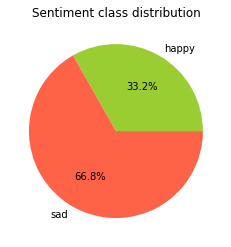

In [ ]:
fig = pie_chart_df.Sentiment.plot.pie(title='Sentiment class distribution',
                                ylabel='', autopct='%1.1f%%', colormap=ListedColormap(['yellowgreen', 'tomato']))
plt.savefig('sad_records.png', dpi=300)

In [ ]:
track_emotions_df

,id,creation_datetime,date,time,sad,distance,steps_home,steps_total,sleep,sleep_quality,calls,social_usage,games_usage,app_usage,walking,tilting,still,running,sport,vehicle,acrophase,mesor,amplitude,start_move,stability,behavior,gyradius,home_cluster,emotions_count,emotions_ratio,biking,clusters_count
0,2,2018-09-20 22:30:04+00:00,2018-09-20,22:29:40,1,2.890210e+04,NaN,NaN,86129.0,NaN,50.0,3494.0,2016.0,19014.0,11241.0,4401.0,57259.0,NaN,NaN,4193.0,NaN,1.00953,0.002704,305.0,NaN,NaN,0.022172,NaN,NaN,NaN,NaN,50.0
1,2,2018-09-24 21:15:44+00:00,2018-09-24,21:15:38,1,2.477490e+02,NaN,NaN,82895.0,NaN,99.0,1798.0,5186.0,17098.0,1161.0,5369.0,10495.0,NaN,NaN,206.0,NaN,1.00177,0.002273,176.0,NaN,NaN,0.000189,NaN,NaN,NaN,NaN,30.0
2,2,2018-09-27 19:35:09+00:00,2018-09-27,19:35:02,1,2.024310e+06,NaN,NaN,NaN,NaN,77.0,9250.0,38816.0,55782.0,243.0,3671.0,9967.0,NaN,NaN,NaN,NaN,1.00120,0.002053,1188.0,NaN,NaN,0.000045,14400.0,NaN,NaN,NaN,13.0
3,2,2018-09-28 18:36:45+00:00,2018-09-28,18:36:38,1,5.123250e+03,NaN,NaN,62508.0,NaN,95.0,3828.0,25094.0,32742.0,NaN,5318.0,3780.0,NaN,NaN,404.0,NaN,1.00066,0.000739,NaN,NaN,NaN,0.007170,9000.0,NaN,NaN,NaN,6.0
4,2,2018-10-03 09:01:11+00:00,2018-10-03,09:00:56,1,4.873380e+03,NaN,NaN,62112.0,NaN,36.0,8272.0,12912.0,29690.0,NaN,3513.0,11062.0,NaN,NaN,1301.0,NaN,1.00112,0.001400,NaN,NaN,NaN,0.004018,23400.0,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42387,2690,2020-05-10 12:41:30+00:00,2020-05-10,12:41:16,0,8.627160e+01,NaN,2648.0,61200.0,NaN,NaN,3360.0,NaN,14319.0,313.0,NaN,24866.0,0.0,0.0,918.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
42388,2690,2020-05-11 12:06:39+00:00,2020-05-11,12:06:29,0,NaN,NaN,NaN,28800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN
42389,2690,2020-05-12 14:18:37+00:00,2020-05-12,14:18:30,0,7.720050e+01,NaN,4721.0,57600.0,NaN,NaN,7030.0,NaN,12302.0,1281.0,NaN,28325.0,0.0,0.0,10333.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,0.0,0.0,NaN
42390,2693,2020-02-14 16:45:41+00:00,2020-02-13,16:45:28,1,4.545480e+02,NaN,1629.0,NaN,NaN,NaN,2105.0,NaN,4942.0,1513.0,NaN,37884.0,0.0,0.0,61.0,6.090000e+13,3.80235,3.432220,NaN,1.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN


In [ ]:
track_emotions_df[['distance', 'steps_home']]

,distance,steps_home
0,2.890210e+04,NaN
1,2.477490e+02,NaN
2,2.024310e+06,NaN
3,5.123250e+03,NaN
4,4.873380e+03,NaN
...,...,...
42387,8.627160e+01,NaN
42388,NaN,NaN
42389,7.720050e+01,NaN
42390,4.545480e+02,NaN


In [ ]:
colors = list([sns.color_palette("Paired")[3], sns.color_palette("Paired")[5]])

In [ ]:
cols_plot = track_emotions_df.columns[4:]
cols_plot

Index(['sad', 'distance', 'steps_home', 'steps_total', 'sleep',
       'sleep_quality', 'calls', 'social_usage', 'games_usage', 'app_usage',
       'walking', 'tilting', 'still', 'running', 'sport', 'vehicle',
       'acrophase', 'mesor', 'amplitude', 'start_move', 'stability',
       'behavior', 'gyradius', 'home_cluster', 'emotions_count',
       'emotions_ratio', 'biking', 'clusters_count'],
      dtype='object')

In [ ]:
cols_plot

Index(['sad', 'distance', 'steps_home', 'steps_total', 'sleep',
       'sleep_quality', 'calls', 'social_usage', 'games_usage', 'app_usage',
       'walking', 'tilting', 'still', 'running', 'sport', 'vehicle',
       'acrophase', 'mesor', 'amplitude', 'start_move', 'stability',
       'behavior', 'gyradius', 'home_cluster', 'emotions_count',
       'emotions_ratio', 'biking', 'clusters_count'],
      dtype='object')

In [ ]:
q = track_emotions_df[cols_plot].quantile(.85)

In [ ]:
axs.flatten()[0].set_xlim([])

NameError: ignored

In [ ]:
len(cols_plot)

In [ ]:
27/4

6.75

In [ ]:
cols_plot

Index(['sad', 'distance', 'steps_home', 'steps_total', 'sleep',
       'sleep_quality', 'calls', 'social_usage', 'games_usage', 'app_usage',
       'walking', 'tilting', 'still', 'running', 'sport', 'vehicle',
       'acrophase', 'mesor', 'amplitude', 'start_move', 'stability',
       'behavior', 'gyradius', 'home_cluster', 'emotions_count',
       'emotions_ratio', 'biking', 'clusters_count'],
      dtype='object')

12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  


KeyboardInterrupt: ignored

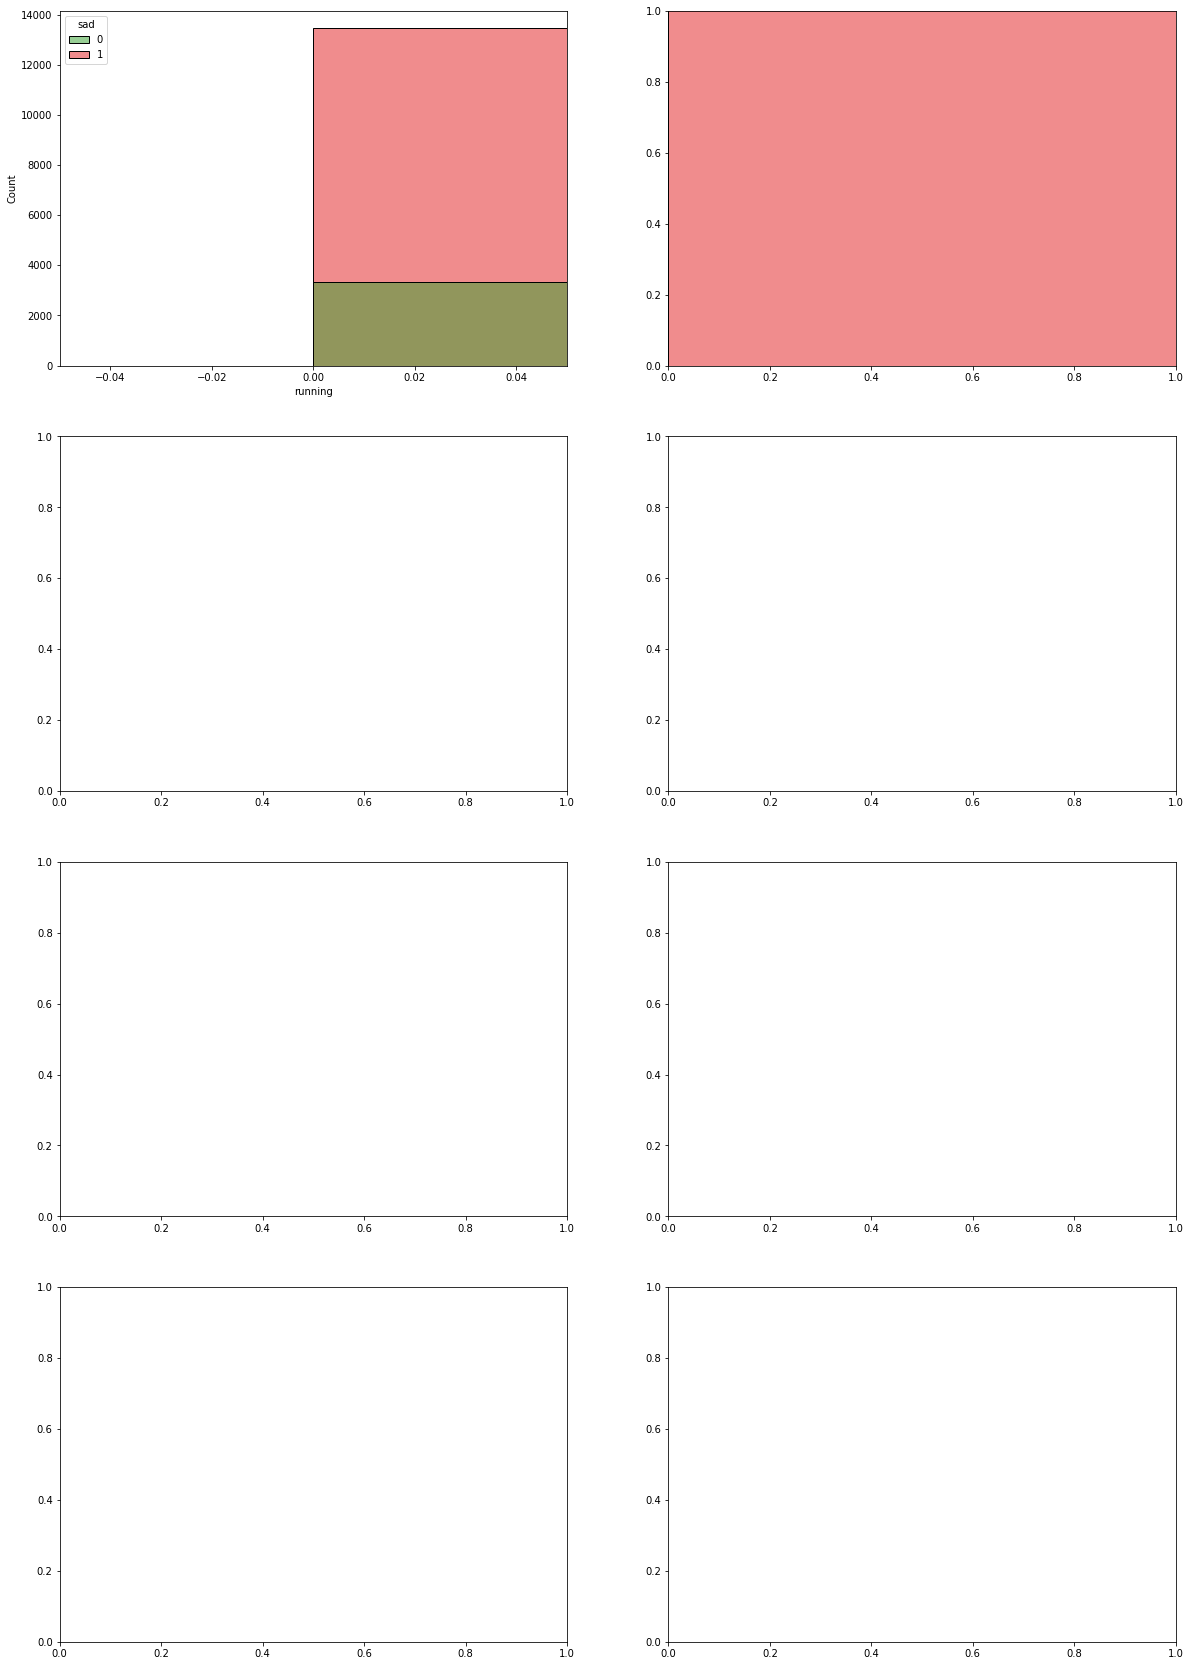

In [ ]:
f, axs = plt.subplots(4, 2, sharey=False, sharex=False, figsize=(20, 30))
axs = axs.flatten()
cols_plot_aux = cols_plot[1:]
for i in range(int((len(cols_plot)-1)/4)*2, int((len(cols_plot)-1)/4)*3-1):
    sns.histplot(track_emotions_df[cols_plot], x=cols_plot_aux[i], hue="sad",
                 palette=colors, ax=axs[i-int((len(cols_plot)-1)/4)*2])
    print(i)
    axs[i-int((len(cols_plot)-1)/4)*2].set_xlim([0, q[i+1]])
plt.savefig('var_distributions_3.png', dpi=300)

In [ ]:
sad, happy = track_emotions_df[cols_plot].groupby(by=['sad'])
sad = sad[1]
happy = happy[1]

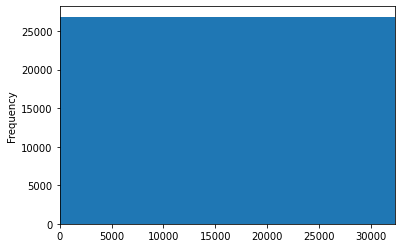

In [ ]:
track_emotions_df['distance'].plot.hist(by='sad', bins=10)

In [ ]:
cols_plot

Index(['sad', 'distance', 'steps_home', 'steps_total', 'sleep',
       'sleep_quality', 'calls', 'social_usage', 'games_usage', 'app_usage',
       'walking', 'tilting', 'still', 'running', 'sport', 'vehicle',
       'acrophase', 'mesor', 'amplitude', 'start_move', 'stability',
       'behavior', 'gyradius', 'home_cluster', 'emotions_count',
       'emotions_ratio', 'biking', 'clusters_count'],
      dtype='object')

(0.0, 32304.00999999999)

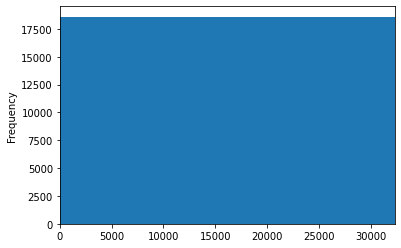

In [ ]:
happy['distance'].plot.hist()
plt.xlim(0, q[1])

In [ ]:
f, axs = plt.subplots(14, 2, sharey=False, sharex=False, figsize=(20, 30))
axs = axs.flatten()
for i, cols in enumerate(cols_plot[1:]):
    sns.histplot(track_emotions_df[cols_plot], x=cols, hue="sad",
                 palette=colors, ax=axs[i])
    
    print(i)
    axs[i].set_xlim([0, q_aux[i]])
plt.savefig('var_distributions_6.png', dpi=300)

In [ ]:
f, axs = plt.subplots(14, 2, sharey=False, sharex=False, figsize=(20, 30))
axs = axs.flatten()
'''cols_aux = ['amplitude', 'start_move', 'stability',
       'behavior', 'gyradius', 'home_cluster', 'emotions_count']
q_aux = q[cols_aux]'''
for i, cols in enumerate(cols_aux):
    sns.histplot(track_emotions_df[cols_plot], x=cols, hue="sad",
                 palette=colors, ax=axs[i])
    
    print(i)
    axs[i].set_xlim([0, q_aux[i]])
plt.savefig('var_distributions_6.png', dpi=300)

0
1
2
3
4
5


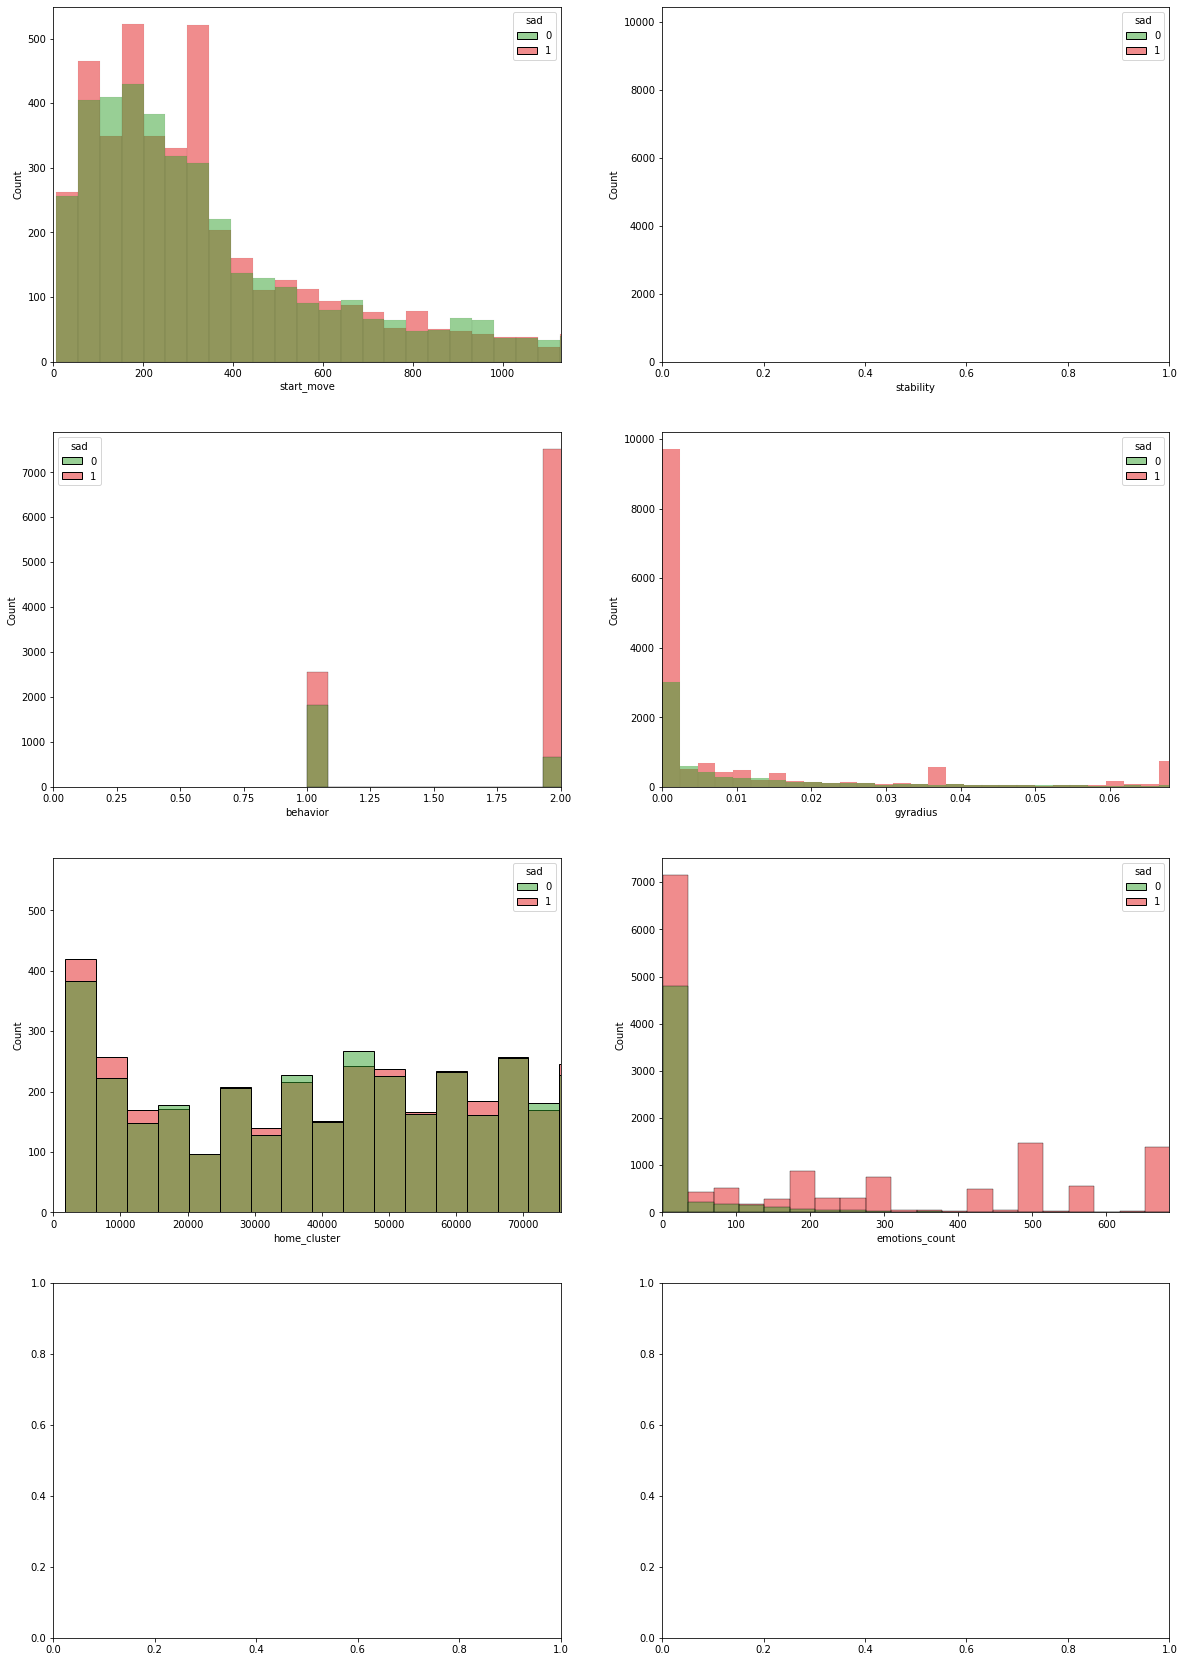

In [ ]:
f, axs = plt.subplots(4, 2, sharey=False, sharex=False, figsize=(20, 30))
axs = axs.flatten()
#'amplitude', 
cols_aux = ['start_move', 'stability',
       'behavior', 'gyradius', 'home_cluster', 'emotions_count']
q_aux = q[cols_aux]
for i, cols in enumerate(cols_aux):
    sns.histplot(track_emotions_df[cols_plot], x=cols, hue="sad",
                 palette=colors, ax=axs[i])
    print(i)
    axs[i].set_xlim([0, q_aux[i]])
plt.savefig('var_distributions_6.png', dpi=300)

In [ ]:
plt.figure(figsize=(20, 30))
sns.histplot(track_emotions_df[cols_plot], x='amplitude', hue="sad",
                 palette=colors)
plt.xlim([0, q['amplitude']])
plt.savefig('var_distributions_7.png', dpi=300)

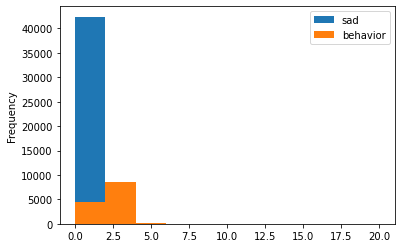

In [ ]:
track_emotions_df[['sad', 'behavior']].plot.hist(by='sad')

In [ ]:
X.to_csv('daily_summary_&_emotions.csv')
np.save('y_sad', y)